In [ ]:

import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("/content/perrin-freres-monthly-champagne.csv")


In [ ]:

df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:

df.tail()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
df = df.dropna()


In [ ]:

df.columns = ["month", "sales"]


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   105 non-null    object 
 1   sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [ ]:

df["month"] = pd.to_datetime(df["month"])
df.set_index("month", inplace=True)

In [ ]:

decom = seasonal_decompose(df["sales"])

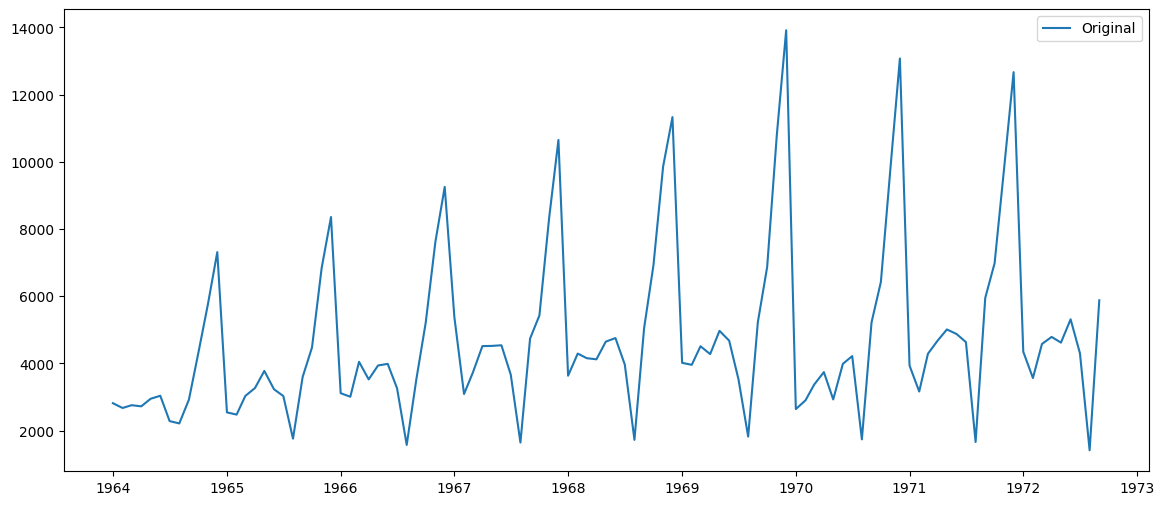

In [ ]:

plt.figure(figsize=(14,6))
plt.plot(df["sales"], label = "Original")
plt.legend(loc = "best")

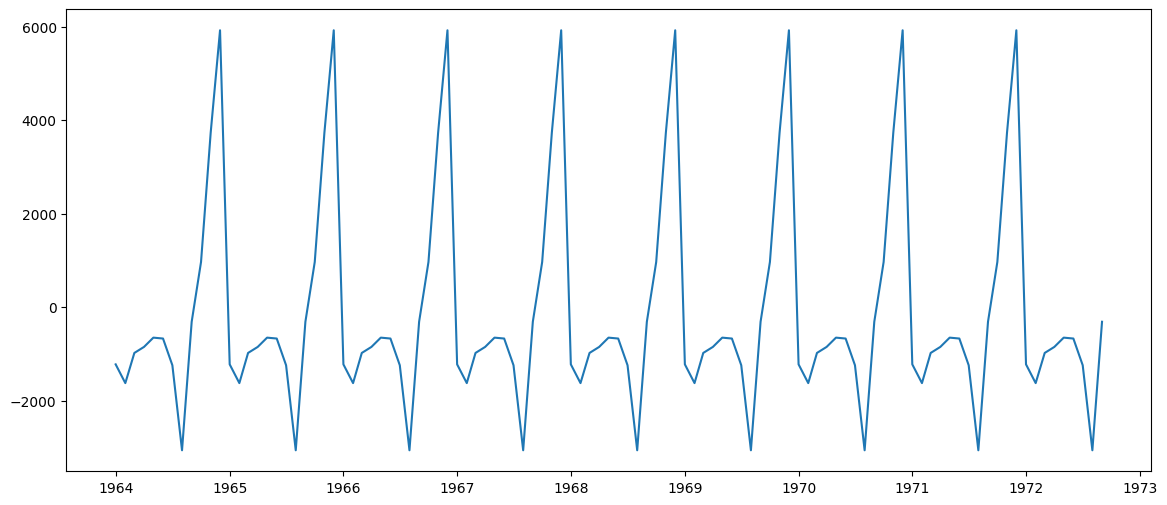

In [ ]:


plt.figure(figsize=(14,6))
plt.plot(decom.seasonal, label="Sesonality")


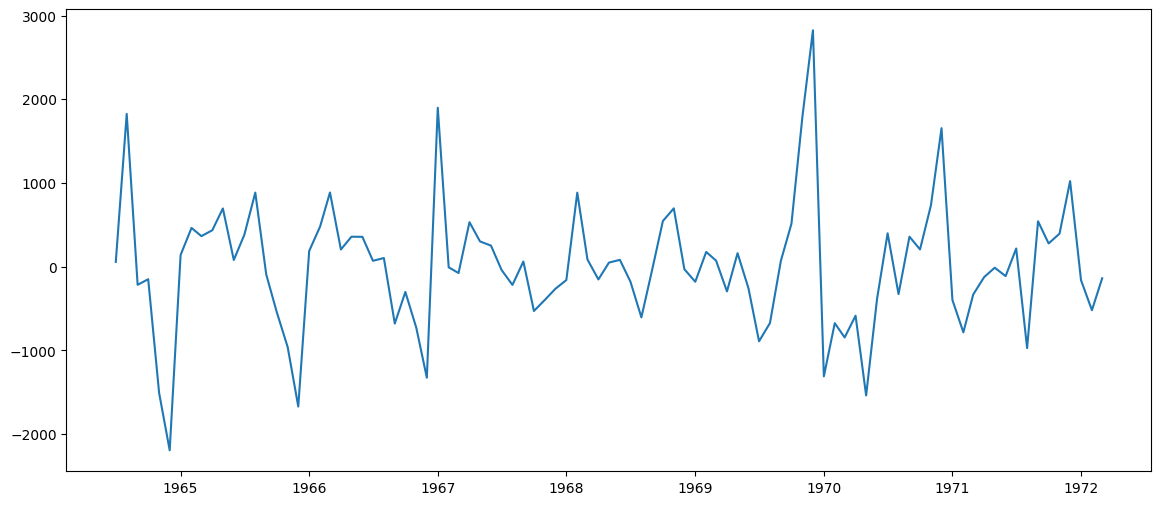

In [ ]:

plt.figure(figsize=(14,6))
plt.plot(decom.resid, label="Residual")

In [ ]:

def adfuller_test(data):
    result = adfuller(data)
    print("Test Statistics: " ,result[0])
    print("p value: " ,result[1])
    print("#lags: " ,result[2])
    if(result[1] < 0.05):
        print("There is no unit root presence (Stationary)")
    else:
        print("There is a unit root presence (Non Stationary)")

In [ ]:

adfuller_test(df["sales"])

Test Statistics:  -1.8335930563276215
p value:  0.36391577166024586
#lags:  11
There is a unit root presence (Non Stationary)


In [ ]:

rolling_mean = df.rolling(window=11).mean()
rolling_std = df.rolling(window=11).std()

In [ ]:
df["ma_sales"] = rolling_mean["sales"]
df["rolling_std_sales"] = rolling_std["sales"]

In [ ]:

df.head(20)

,sales,ma_sales,rolling_std_sales
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
1964-06-01,3036.0,NaN,NaN
1964-07-01,2282.0,NaN,NaN
1964-08-01,2212.0,NaN,NaN
1964-09-01,2922.0,NaN,NaN


<Axes: xlabel='month'>

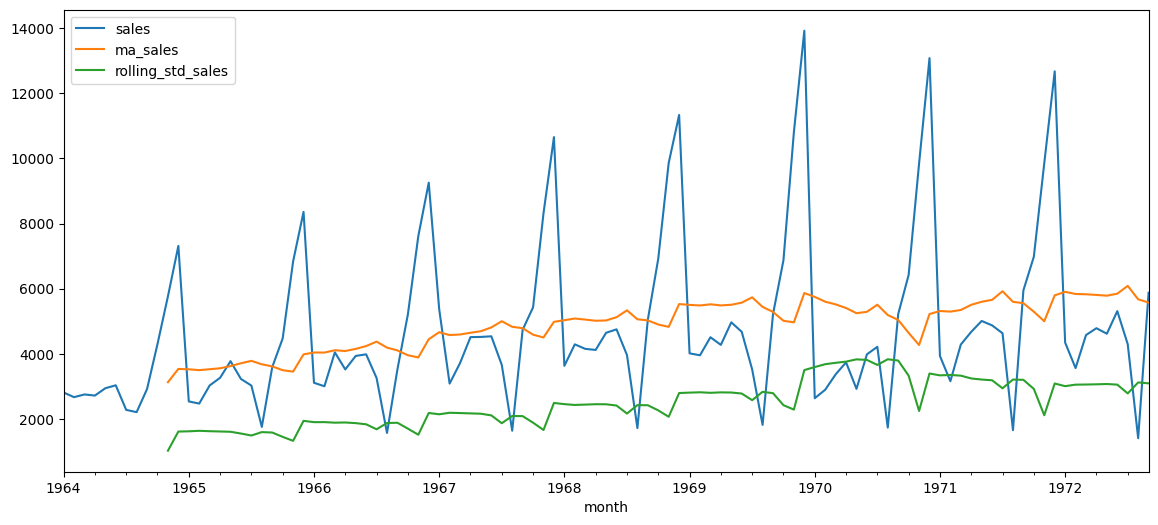

In [ ]:

df.plot(figsize=(14,6))

In [ ]:

df_diff_ma_sales = df["sales"] - df["ma_sales"]

In [ ]:

adfuller_test(df_diff_ma_sales.dropna())

Test Statistics:  -2.012208203713636
p value:  0.2812460144564223
#lags:  12
There is a unit root presence (Non Stationary)


In [ ]:

df_diff_12 = df["sales"] - df["sales"].shift(12)

In [ ]:
adfuller_test(df_diff_12.dropna())

Test Statistics:  -7.626619157213166
p value:  2.0605796968136632e-11
#lags:  0
There is no unit root presence (Stationary)


<Axes: xlabel='month'>

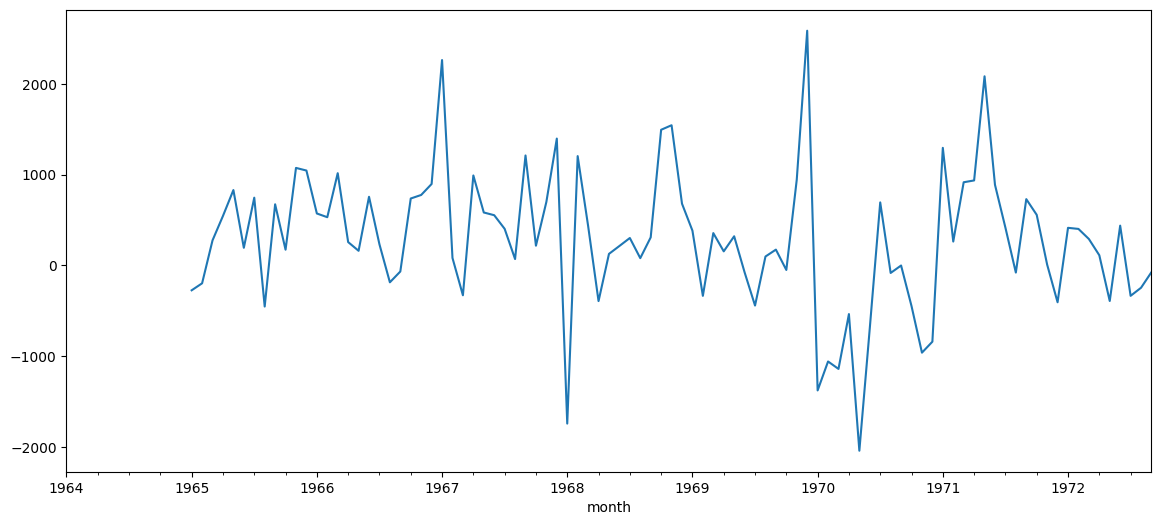

In [ ]:

df_diff_12.plot(figsize=(14,6))

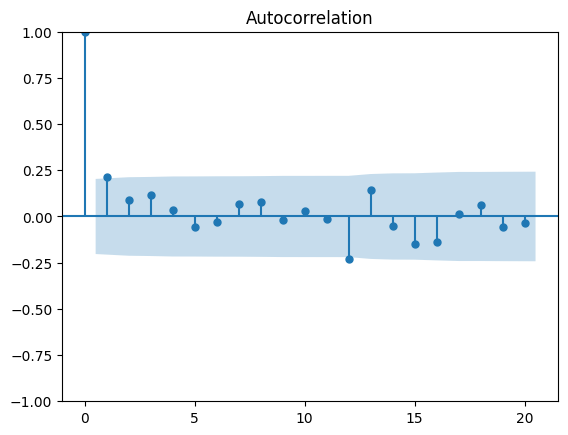

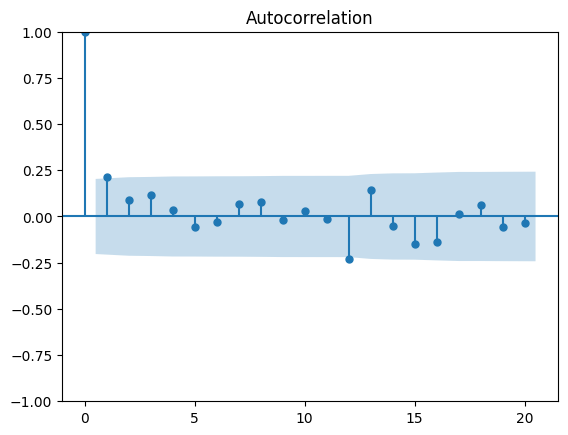

In [ ]:

plot_acf(df_diff_12.dropna())

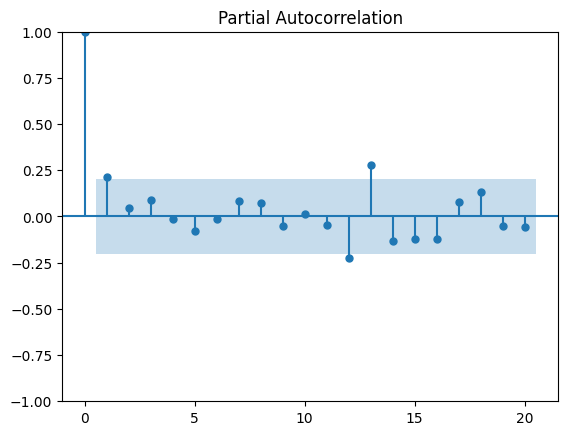

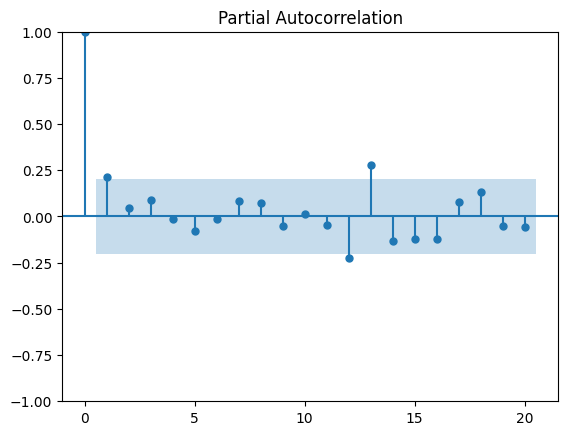

In [ ]:

plot_pacf(df_diff_12.dropna())

In [ ]:

arima_model = ARIMA(df["sales"], order=(1,1,1))
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:

arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 04 Sep 2025   AIC                           1911.627
Time:                        14:15:21   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.000      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.319      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

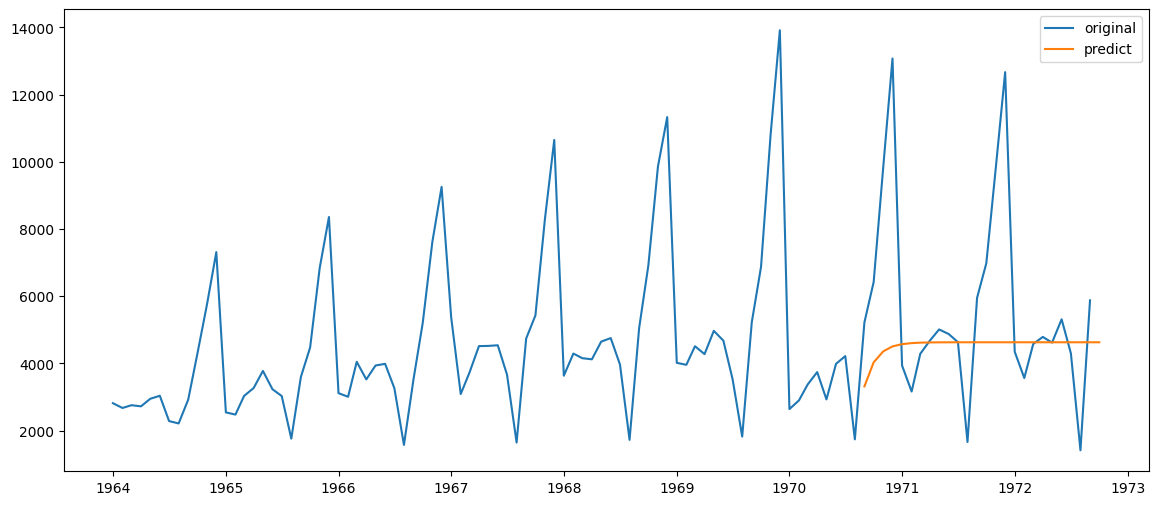

In [ ]:

arima_predict = arima_model_fit.predict(start = 80, end = 105, dynamic= True)

plt.figure(figsize=(14,6))
plt.plot(df["sales"], label = "original")
plt.plot(arima_predict, label = "predict")

plt.legend(loc = "best")

In [ ]:

sarimax_model = sm.tsa.statespace.SARIMAX(df["sales"], order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_model_fit = sarimax_model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:

sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Thu, 04 Sep 2025   AIC                           1486.804
Time:                                    14:16:06   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

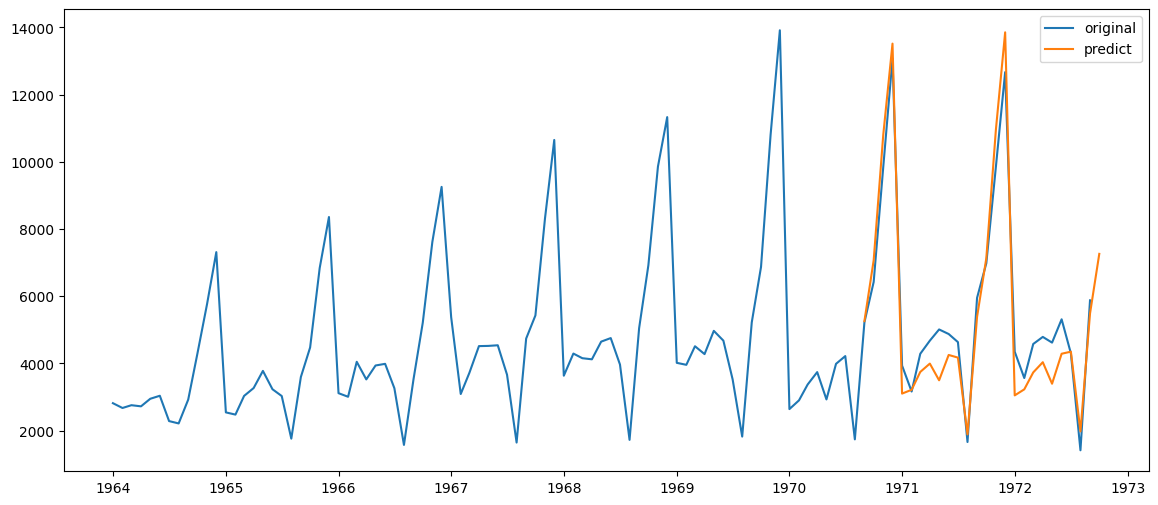

In [ ]:

sarimax_predict = sarimax_model_fit.predict(start = 80, end = 105, dynamic= True)

plt.figure(figsize=(14,6))
plt.plot(df["sales"], label = "original")
plt.plot(sarimax_predict, label = "predict")

plt.legend(loc = "best")

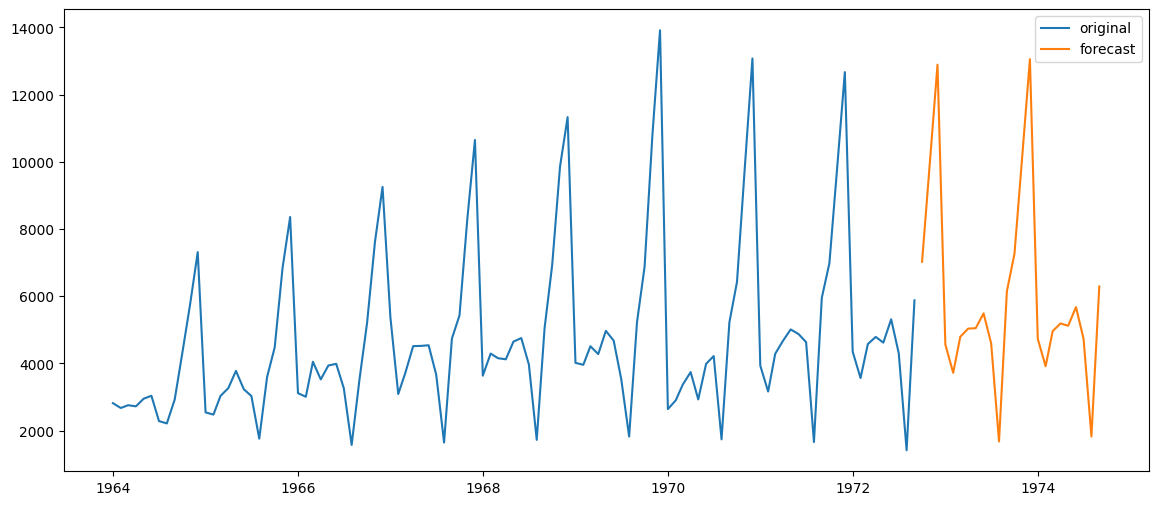

In [ ]:

sarimax_forecast = sarimax_model_fit.forecast(steps=24)


plt.figure(figsize=(14,6))
plt.plot(df["sales"], label = "original")
plt.plot(sarimax_forecast, label = "forecast")

plt.legend(loc = "best")